In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('final_data.csv')

In [3]:
df.head(5)

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Title,Date,Source,Text,Stock,Target,Text_preprocessed,Tokens,Stock Data,Difference,Vectors,Keywords,Vectors_keywords
0,0,0,0,0,0,0,Акционер «Газпрома» захотел судиться,2018-07-04 00:00:00.000,lenta.ru,Миноритарный акционер «Газпрома» Леонид Пронин...,GAZP,0,миноритарный акционер газпрома леонид пронин п...,"['миноритарный', ' ', 'акционер', ' ', 'газпро...","[{'id': 1792325, 'date': Timestamp('2018-07-03...",0.065512,[ 5.94658367e-02 -1.31940141e-01 -1.52652785e-...,собрание пронин леонид газпром общее собрание ...,[ 1.04942583e-01 -1.67816073e-01 -1.46794438e-...
1,1,1,1,1,1,1,Против гонщиков на Gelandewagen возбудили еще ...,2016-06-09 00:00:00.000,lenta.ru,Следственный комитет России возбудил еще одно ...,LKOH,1,следственный комитет россии возбудил еще одно ...,"['следственный', ' ', 'комитет', ' ', 'россия'...","[{'id': 1205599, 'date': Timestamp('2016-06-08...",1.196768,[ 5.31012267e-02 -1.54625624e-01 -1.42054558e-...,молодые люди хулиганство отношение представите...,[ 6.64389879e-02 -1.31200820e-01 -1.75397590e-...
2,2,2,2,2,2,2,«Роснефть» выиграла аукцион на Эргинский участ...,2017-07-17 00:00:00.000,lenta.ru,«Роснефть» выиграла аукцион на крупнейший учас...,GAZP,0,роснефть выиграла аукцион на крупнейший участо...,"['роснефть', ' ', 'выигрывать', ' ', 'аукцион'...","[{'id': 1618442, 'date': Timestamp('2017-07-17...",0.216540,[ 6.50676936e-02 -1.43738016e-01 -1.44902498e-...,роснефть разработка аукцион эргинский участок ...,[ 0.03375114 -0.13451192 -0.10477206 0.022402...
3,3,4,4,4,4,4,Российские богачи стали еще богаче,2019-11-25 00:00:00.000,lenta.ru,Совокупное состояние самых успешных российских...,LKOH,0,совокупное состояние самых успешных российских...,"['совокупный', ' ', 'состояние', ' ', 'самый',...","[{'id': 1680318, 'date': Timestamp('2019-11-25...",0.737691,[ 7.50628635e-02 -1.27340287e-01 -1.38004065e-...,состояние общее место владимир основа данных р...,[ 9.34043527e-02 -1.45955071e-01 -1.01607829e-...
4,4,5,5,5,5,5,Украина почти полностью отказалась от закупок ...,2011-05-17 00:00:00.000,lenta.ru,Украина во втором квартале 2011 года почти не ...,GAZP,-1,украина во втором квартале года почти не буде...,"['украина', ' ', 'второй', ' ', 'квартал', ' '...","[{'id': 439416, 'date': Timestamp('2011-05-16 ...",-1.194343,[ 5.14298268e-02 -1.18821912e-01 -1.39331117e-...,россия украина цена тысяча кубометров газ азар...,[ 2.22341921e-02 -8.54039714e-02 -1.24103017e-...


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
df['Target'] = 0

In [6]:
df.loc[df['Difference'] >= 3, 'Target'] = 1
df.loc[df['Difference'] <= -4, 'Target'] = -1

In [327]:
df['Target'].value_counts()

Target
 0    10929
 1      592
-1      329
Name: count, dtype: int64

In [ ]:
df.loc[abs(df['Difference']) >= 3, 'Target']

In [3]:
cleaned_vectors = df['Vectors'].apply(lambda x: x.replace('\n', '').replace('[', '').replace(']', '').split())

In [8]:
df['Vectors'] = cleaned_vectors

In [9]:
df['Vectors_mean'] = [np.float_(vector) for vector in cleaned_vectors]
kernel = np.array([0.5, 0.25, 0.25])  
df['Vectors_mean'] = df['Vectors_mean'].apply(lambda x: np.convolve(x, kernel, mode='valid').mean())
print(df['Vectors_mean'])

0        0.029853
1        0.027660
2        0.028587
3        0.026409
4        0.028923
           ...   
11845    0.028765
11846    0.027389
11847    0.029616
11848    0.027707
11849    0.029612
Name: Vectors_mean, Length: 11850, dtype: float64


In [135]:
vec = [np.float_(vector) for vector in cleaned_vectors]

In [136]:
df['Vectors'] = vec

In [138]:
# В данном примере используется простая свертка: умножение каждого элемента на весовой коэффициент и суммировани
kernel = np.array([0.5, 0.25, 0.25])  
df['Vectors'] = df['Vectors'].apply(lambda x: np.convolve(x, kernel, mode='valid').mean())
print(df['Vectors'])

0        0.029853
1        0.027660
2        0.028587
3        0.026409
4        0.028923
           ...   
11845    0.028765
11846    0.027389
11847    0.029616
11848    0.027707
11849    0.029612
Name: Vectors, Length: 11850, dtype: float64


In [4]:
def clean_keywords(keywords_str):
    # Преобразование строки ключевых слов в список слов
    keywords_list = eval(keywords_str)  # Преобразуем строку в список с помощью eval
    
    # Фильтрация списка ключевых слов: оставляем только непустые слова
    cleaned_list = [word.strip() for word in keywords_list if word.strip()]
    
    return cleaned_list

# Применение функции clean_keywords к столбцу 'Keywords' и создание нового столбца 'Cleaned_Keywords'
df['Tokens'] = df['Tokens'].apply(clean_keywords)

In [11]:
df_vectors = pd.DataFrame(cleaned_vectors.to_list())

# Переименование столбцов
df_vectors.columns = [f"vector_{i+1}" for i in range(len(df_vectors.columns))]

# Вывод результата
print(df_vectors)

             vector_1         vector_2         vector_3         vector_4  \
0      5.94658367e-02  -1.31940141e-01  -1.52652785e-01  -1.29171899e-02   
1      5.31012267e-02  -1.54625624e-01  -1.42054558e-01   1.10708000e-02   
2      6.50676936e-02  -1.43738016e-01  -1.44902498e-01   8.60205293e-03   
3      7.50628635e-02  -1.27340287e-01  -1.38004065e-01  -7.82412942e-03   
4      5.14298268e-02  -1.18821912e-01  -1.39331117e-01   1.39038428e-03   
...               ...              ...              ...              ...   
11845      0.06409794      -0.11593365      -0.14903103      -0.01727073   
11846      0.06445811      -0.13411763       -0.1495964      -0.01145486   
11847  5.83788753e-02  -1.36351988e-01  -1.71923772e-01   1.84605680e-02   
11848  8.01764652e-02  -1.43979669e-01  -1.48425564e-01  -1.02000507e-02   
11849      0.05605159      -0.14465423      -0.15153225      -0.00433046   

              vector_5        vector_6        vector_7         vector_8  \
0      -3.53

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Подготовка данных
X = df['Vectors']  # Предположим, что 'text_column' содержит текстовые данные
y = df['Target']  # Предположим, что 'target_column' содержит целевую переменную

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
text_clf = Pipeline([
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB ())
])
text_clf.fit(X_train, y_train)

# Оценка модели
y_pred = text_clf.predict(X_test)
print(classification_report(y_test, y_pred))

ValueError: setting an array element with a sequence.

In [7]:
df['Tokens']

0        [миноритарный, акционер, газпром, леонид, прон...
1        [следственный, комитет, россия, возбуждать, од...
2        [роснефть, выигрывать, аукцион, крупный, участ...
3        [совокупный, состояние, самый, успешный, росси...
4        [украина, второй, квартал, год, закупать, газ,...
                               ...                        
11845    [обязанность, евросоюз, входить, выдавать, кре...
11846    [мечесть, договариваться, газпромбанк, продажа...
11847    [генеральный, директор, компания, газпромнефть...
11848    [январь, год, суммарный, убыток, основной, дея...
11849    [российский, нефтяной, компания, роснефть, при...
Name: Tokens, Length: 11850, dtype: object

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Нормализация данных
scaler = StandardScaler()
scaled_vectors = scaler.fit_transform(df_vectors)


NameError: name 'df_vectors' is not defined

In [44]:
scaler = StandardScaler()
df['Vectors'] = scaler.fit_transform(df['Vectors'])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [65]:
# Применение PCA
pca = PCA(n_components=2)  # Выбор количества компонентов
pca_result = pca.fit_transform(scaled_vectors)

# Создание DataFrame с результами PCA
df_pca = pd.DataFrame(data=pca_result)

# Вывод результата
print(df_pca)

               0         1
0      -5.643176  4.395268
1      12.528284  2.578376
2      -1.066326 -1.394350
3       6.326611  0.032254
4      -2.184093  6.819195
...          ...       ...
11845  -0.726503  3.770259
11846  -5.025789 -2.013636
11847  -5.529483  0.484726
11848  -4.954606 -5.108805
11849  -3.893105  5.720837

[11850 rows x 2 columns]


In [71]:
df = df.merge(df_pca, left_index=True, right_index=True)

In [72]:
df

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Title,Date,Source,Text,...,Target,Text_preprocessed,Tokens,Stock Data,Difference,Vectors,Keywords,Vectors_keywords,0,1
0,0,0,0,0,0,0,Акционер «Газпрома» захотел судиться,2018-07-04 00:00:00.000,lenta.ru,Миноритарный акционер «Газпрома» Леонид Пронин...,...,1,миноритарный акционер газпрома леонид пронин п...,"['миноритарный', ' ', 'акционер', ' ', 'газпро...","[{'id': 1792325, 'date': Timestamp('2018-07-03...",0.065512,"[5.94658367e-02, -1.31940141e-01, -1.52652785e...",собрание пронин леонид газпром общее собрание ...,[ 1.04942583e-01 -1.67816073e-01 -1.46794438e-...,-5.643176,4.395268
1,1,1,1,1,1,1,Против гонщиков на Gelandewagen возбудили еще ...,2016-06-09 00:00:00.000,lenta.ru,Следственный комитет России возбудил еще одно ...,...,1,следственный комитет россии возбудил еще одно ...,"['следственный', ' ', 'комитет', ' ', 'россия'...","[{'id': 1205599, 'date': Timestamp('2016-06-08...",1.196768,"[5.31012267e-02, -1.54625624e-01, -1.42054558e...",молодые люди хулиганство отношение представите...,[ 6.64389879e-02 -1.31200820e-01 -1.75397590e-...,12.528284,2.578376
2,2,2,2,2,2,2,«Роснефть» выиграла аукцион на Эргинский участ...,2017-07-17 00:00:00.000,lenta.ru,«Роснефть» выиграла аукцион на крупнейший учас...,...,1,роснефть выиграла аукцион на крупнейший участо...,"['роснефть', ' ', 'выигрывать', ' ', 'аукцион'...","[{'id': 1618442, 'date': Timestamp('2017-07-17...",0.216540,"[6.50676936e-02, -1.43738016e-01, -1.44902498e...",роснефть разработка аукцион эргинский участок ...,[ 0.03375114 -0.13451192 -0.10477206 0.022402...,-1.066326,-1.394350
3,3,4,4,4,4,4,Российские богачи стали еще богаче,2019-11-25 00:00:00.000,lenta.ru,Совокупное состояние самых успешных российских...,...,1,совокупное состояние самых успешных российских...,"['совокупный', ' ', 'состояние', ' ', 'самый',...","[{'id': 1680318, 'date': Timestamp('2019-11-25...",0.737691,"[7.50628635e-02, -1.27340287e-01, -1.38004065e...",состояние общее место владимир основа данных р...,[ 9.34043527e-02 -1.45955071e-01 -1.01607829e-...,6.326611,0.032254
4,4,5,5,5,5,5,Украина почти полностью отказалась от закупок ...,2011-05-17 00:00:00.000,lenta.ru,Украина во втором квартале 2011 года почти не ...,...,0,украина во втором квартале года почти не буде...,"['украина', ' ', 'второй', ' ', 'квартал', ' '...","[{'id': 439416, 'date': Timestamp('2011-05-16 ...",-1.194343,"[5.14298268e-02, -1.18821912e-01, -1.39331117e...",россия украина цена тысяча кубометров газ азар...,[ 2.22341921e-02 -8.54039714e-02 -1.24103017e-...,-2.184093,6.819195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11845,12098,19649,19649,19649,20187,20187,"ЕС отказался от совета Путина ""подкинуть милли...",2009-11-05 00:00:00.000,lenta.ru,В обязанности Евросоюза не входит выдавать кре...,...,0,в обязанности евросоюза не входит выдавать кре...,"['обязанность', ' ', 'евросоюз', ' ', 'входить...","[{'id': 158179, 'date': Timestamp('2009-11-05 ...",-2.084373,"[0.06409794, -0.11593365, -0.14903103, -0.0172...",нафтогаз украина 4 ноября улофссон сложность р...,[ 0.09603313 -0.12639338 -0.15121603 -0.032008...,-0.726503,3.770259
11846,12099,19650,19650,19650,20188,20188,Газпромбанк получит долю в угольном проекте «М...,2016-04-06 00:00:00.000,lenta.ru,«Мечел» договорился с Газпромбанком о продаже ...,...,0,мечел договорился с газпромбанком о продаже до...,"['мечесть', ' ', 'договариваться', ' ', 'газпр...","[{'id': 1377836, 'date': Timestamp('2016-04-05...",-0.257052,"[0.06445811, -0.13411763, -0.1495964, -0.01145...",мечел сбербанк мечело газпромбанк часть долга ...,[ 9.71948802e-02 -1.43111676e-01 -1.56862944e-...,-5.025789,-2.013636
11847,12100,19651,19651,19651,20189,20189,Транспортная прокуратура обнаружила в Шереметь...,2017-09-11 00:00:00.000,lenta.ru,Генеральный директор компании «Газпромнефть — ...,...,1,генеральный директор компании газпромнефть аэ...,"['генеральный', ' ', 'директор', ' ', 'комп

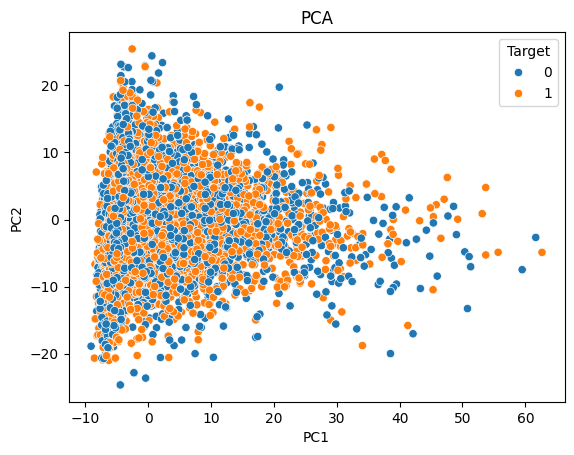

In [144]:
sns.scatterplot(x='PC1', y='PC2', hue=df.Target, data=df_pca)
plt.title("PCA")
plt.show()

In [17]:
from sklearn.manifold import TSNE

tsne2D = TSNE(n_components=2)
tsne_data2D = tsne2D.fit_transform(scaled_vectors)
tsne2D_df = pd.DataFrame(data = tsne_data2D, columns = ['PC1', 'PC2'])

sns.scatterplot(x='PC1', y='PC2', hue=df.Target, data=tsne2D_df)
plt.title("T-SNE")
plt.show()

ValueError: 'n_components' should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.

/Users/portnovaxenia/PycharmProjects/news_scrapper/venv/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/portnovaxenia/PycharmProjects/news_scrapper/venv/lib/python3.9/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/portnovaxenia/PycharmProjects/news_scrapper/venv/lib/python3.9/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/portnovaxenia/PycharmProjects/news_scrapper/venv/lib/python3.9/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarni

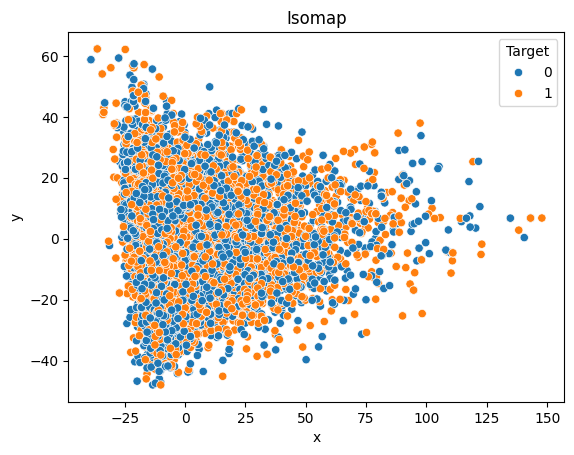

In [156]:
from sklearn.manifold import Isomap

iso2D = Isomap(n_components=2, n_neighbors=5)

iso_data2D = iso2D.fit_transform(scaled_vectors)
iso_df = pd.DataFrame(data =  iso_data2D, columns = ['x', 'y'])

sns.scatterplot(x='x', y='y', hue=df.Target, data=iso_df)
plt.title("Isomap")
plt.show()

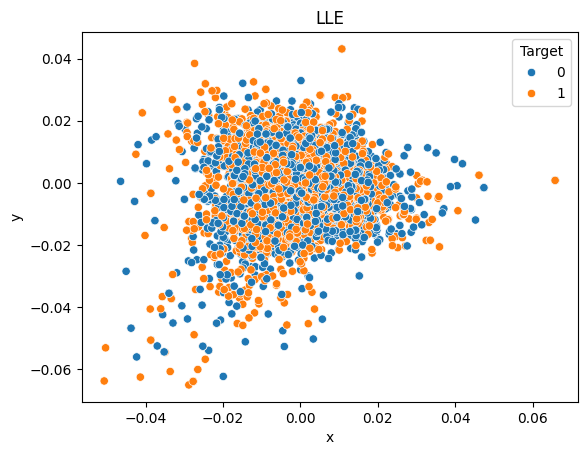

In [158]:
from sklearn.manifold import LocallyLinearEmbedding

lle_2D = LocallyLinearEmbedding(n_components=2, n_neighbors=50)

lle_data2D = lle_2D.fit_transform(scaled_vectors)
lle_df = pd.DataFrame(data = lle_data2D, columns = ['x', 'y'])

sns.scatterplot(x='x', y='y', hue=df.Target, data=lle_df)
plt.title("LLE")
plt.show()

In [124]:
import ast
import numpy as np

# Преобразование строки в список чисел
def parse_vector_string(vector_string):
    try:
        # Преобразование строки в список с помощью ast.literal_eval
        vector_list = ast.literal_eval(vector_string)
        # Преобразование каждого элемента в числовой формат
        vector_values = [float(value) for value in vector_list]
        return vector_values
    except (SyntaxError, ValueError):
        return np.nan  # Если строка не удалось преобразовать, возвращаем NaN

# Применение функции к столбцу 'Vectors' и создание нового столбца с преобразованными данными
temp = df['Vectors'].apply(parse_vector_string)
temp

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
11845   NaN
11846   NaN
11847   NaN
11848   NaN
11849   NaN
Name: Vectors, Length: 11850, dtype: float64

In [144]:
X.shape

(1538, 19)

In [141]:
duplicate_data = df.sample(n=100, replace=True)  

df = pd.concat([df, duplicate_data], ignore_index=True)

In [12]:
df.columns

Index(['Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2',
       'Unnamed: 0.1', 'Unnamed: 0', 'Title', 'Date', 'Source', 'Text',
       'Stock', 'Target', 'Text_preprocessed', 'Tokens', 'Stock Data',
       'Difference', 'Vectors', 'Keywords', 'Vectors_keywords'],
      dtype='object')

In [492]:
temp = df[df['Target'] != -1]

In [12]:
from sklearn.model_selection import train_test_split

X = df[['Title', 'Date', 'Source', 'Text',
       'Stock', 'Text_preprocessed', 'Tokens', 'Stock Data',
       'Difference', 'Vectors', 'Keywords', 'Vectors_keywords']]
#X = (np.array([list(map(np.float_, vector)) for vector in cleaned_vectors]))
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, shuffle=True, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, random_state=42, stratify=y_train)

In [24]:
gb_clf = GradientBoostingClassifier(n_estimators=30, learning_rate=1, max_features=6, max_depth=8, random_state=42)
gb_clf.fit(X_train['Vectors'], y_train)

print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train['Vectors'],  y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test['Vectors'], y_test)))

NameError: name 'GradientBoostingClassifier' is not defined

In [75]:
X_train.columns

Index([     'Unnamed: 0.5',      'Unnamed: 0.4',      'Unnamed: 0.3',
            'Unnamed: 0.2',      'Unnamed: 0.1',        'Unnamed: 0',
                   'Title',              'Date',            'Source',
                    'Text',             'Stock',            'Target',
       'Text_preprocessed',            'Tokens',        'Stock Data',
              'Difference',           'Vectors',          'Keywords',
        'Vectors_keywords',                   0,                   1],
      dtype='object')

In [34]:
y_train.value_counts()

Target
 0    7511
 1     566
-1     484
Name: count, dtype: int64

In [285]:
from sklearn.utils.class_weight import compute_class_weight
 
classes = np.unique(y_train)
weights = compute_class_weight(class_weight={0:10, 1:0.10, -1:0.8 }, classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

In [485]:
df[df['Target'] != -1]

,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Title,Date,Source,Text,...,Target,Text_preprocessed,Tokens,Stock Data,Difference,Vectors,Keywords,Vectors_keywords,Volume,Volume_target
0,0,0,0,0,0,0,Акционер «Газпрома» захотел судиться,2018-07-04 00:00:00.000,lenta.ru,Миноритарный акционер «Газпрома» Леонид Пронин...,...,0,миноритарный акционер газпрома леонид пронин п...,"['миноритарный', ' ', 'акционер', ' ', 'газпро...","[{'id': 1792325, 'date': Timestamp('2018-07-03...",0.065512,0.029853,собрание пронин леонид газпром общее собрание ...,[ 1.04942583e-01 -1.67816073e-01 -1.46794438e-...,-69.565217,1
1,1,1,1,1,1,1,Против гонщиков на Gelandewagen возбудили еще ...,2016-06-09 00:00:00.000,lenta.ru,Следственный комитет России возбудил еще одно ...,...,0,следственный комитет россии возбудил еще одно ...,"['следственный', ' ', 'комитет', ' ', 'россия'...","[{'id': 1205599, 'date': Timestamp('2016-06-08...",1.196768,0.027660,молодые люди хулиганство отношение представите...,[ 6.64389879e-02 -1.31200820e-01 -1.75397590e-...,-81.481481,1
2,2,2,2,2,2,2,«Роснефть» выиграла аукцион на Эргинский участ...,2017-07-17 00:00:00.000,lenta.ru,«Роснефть» выиграла аукцион на крупнейший учас...,...,0,роснефть выиграла аукцион на крупнейший участо...,"['роснефть', ' ', 'выигрывать', ' ', 'аукцион'...","[{'id': 1618442, 'date': Timestamp('2017-07-17...",0.216540,0.028587,роснефть разработка аукцион эргинский участок ...,[ 0.03375114 -0.13451192 -0.10477206 0.022402...,1327.272727,1
3,3,4,4,4,4,4,Российские богачи стали еще богаче,2019-11-25 00:00:00.000,lenta.ru,Совокупное состояние самых успешных российских...,...,0,совокупное состояние самых успешных российских...,"['совокупный', ' ', 'состояние', ' ', 'самый',...","[{'id': 1680318, 'date': Timestamp('2019-11-25...",0.737691,0.026409,состояние общее место владимир основа данных р...,[ 9.34043527e-02 -1.45955071e-01 -1.01607829e-...,1280.000000,1
4,4,5,5,5,5,5,Украина почти полностью отказалась от закупок ...,2011-05-17 00:00:00.000,lenta.ru,Украина во втором квартале 2011 года почти не ...,...,0,украина во втором квартале года почти не буде...,"['украина', ' ', 'второй', ' ', 'квартал', ' '...","[{'id': 439416, 'date': Timestamp('2011-05-16 ...",-1.194343,0.028923,россия украина цена тысяча кубометров газ азар...,[ 2.22341921e-02 -8.54039714e-02 -1.24103017e-...,2.941176,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11845,12098,19649,19649,19649,20187,20187,"ЕС отказался от совета Путина ""подкинуть милли...",2009-11-05 00:00:00.000,lenta.ru,В обязанности Евросоюза не входит выдавать кре...,...,0,в обязанности евросоюза не входит выдавать кре...,"['обязанность', ' ', 'евросоюз', ' ', 'входить...","[{'id': 158179, 'date': Timestamp('2009-11-05 ...",-2.084373,0.028765,нафтогаз украина 4 ноября улофссон сложность р...,[ 0.09603313 -0.12639338 -0.15121603 -0.032008...,1718.279570,1
11846,12099,19650,19650,19650,20188,20188,Газпромбанк получит долю в угольном проекте «М...,2016-04-06 00:00:00.000,lenta.ru,«Мечел» договорился с Газпромбанком о продаже ...,...,0,мечел договорился с газпромбанком о продаже до...,"['мечесть', ' ', 'договариваться', ' ', 'газпр...","[{'id': 1377836, 'date': Timestamp('2016-04-05...",-0.257052,0.027389,мечел сбербанк мечело газпромбанк часть долга ...,[ 9.71948802e-02 -1.43111676e-01 -1.56862944e-...,-60.975610,1
11847,12100,19651,19651,19651,20189,20189,Транспортная прокуратура обнаружила в Шереметь...,2017-09-11 00:00:00.000,lenta.ru,Генеральный директор компании «Газпромнефть — ...,...,0,генеральный директор компании газпромнефть аэ...,"['генеральный', ' ', 'директор', ' ', 'компани...","[{'id': 1647967, 'date': Timestamp('2017-09-11...",0.153226,0.029616,ммтп необходимый запас топлива поставки топлив...,[ 6.18260764e-02 -1.05248384e-01 -1.70043692e-...,12800.000000,1
11848,12101,19652,19652,19652,20190,20190,Шесть крупнейших банков России сообщили о мног...,2009-02-17 00:00:00.000,lenta.ru,В январе

In [11]:
df['Tokens'] = [' '.join(lst) for lst in df['Tokens'].values]


In [22]:
array_of_strings

['миноритарный акционер газпром леонид пронин планировать обращаться суд требование устранять нарушение который мнение возникать проведение годовой общий собрание акционер газовый монополия предприниматель рассказывать информационный агентство rns уточнять давно являться акционер газпром второй год подряд попадать собрание приходить собрание час минута зарегистрироваться смочь близко час минута главный зал попадать охрана пускать зал вынуждать проходить зал трансляция видеоэкран пожаловаться леонид пронин зал вестись трансляция общий собрание увидеть два зал находиться немногий человек желать присутствовать собрание результат второй год подряд смочь попадать обсуждение вопрос собрание акционер выступать пункт повестка общий собрание давать смочь задавать вопрос докладчик это нарушение мой право акционер компания быть отстаивать весь законный способ число путем подача иск суд леонид пронин уточнять день собрание многий акционер смочь зарегистрироваться собрание близко конец обсуждение в

In [19]:
for i in df['Tokens'].values:
    print(df['Tokens'].values)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [37]:
from sklearn.metrics import classification_report,accuracy_score, precision_score
from catboost import Pool, CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

text_features = ['Title', 'Tokens', 'Keywords']

train_pool = Pool(
    X_train[['Title', 'Tokens',  'Keywords', 'Stock']], 
    y_train, 
    text_features=text_features,
    cat_features=['Stock']
)
valid_pool = Pool(
    X_val[['Title','Tokens', 'Keywords', 'Stock']],
    y_val,
    text_features=text_features,
    cat_features=['Stock']
)
test_pool = Pool(
    X_test[['Title','Tokens', 'Keywords', 'Stock']],
    y_test, 
    text_features=text_features,
    cat_features=['Stock']
)


catboost_params = {
    'iterations': 500,
    #'learning_rate': 0.05,
    'eval_metric': 'AUC',
    'auto_class_weights': 'SqrtBalanced',
    'loss_function': 'MultiClass',
    'early_stopping_rounds': 20,
    'use_best_model': True,
    'bootstrap_type':'MVS',
    'grow_policy':'Depthwise',
    'depth': 16,
    'verbose': 10,
    'random_seed': 42
}

model = CatBoostClassifier(**catboost_params)
model.fit(train_pool, eval_set=valid_pool, plot=True)
pred = model.predict(test_pool)
print(classification_report(y_test,pred))
print(precision_score(y_test,pred, average='macro',  labels=np.unique(y_test)))

A Jupyter Widget

Learning rate set to 0.147219
0:	test: 0.5475999	best: 0.5475999 (0)	total: 1.68s	remaining: 13m 57s
10:	test: 0.6117944	best: 0.6117944 (10)	total: 23.4s	remaining: 17m 20s
20:	test: 0.6289410	best: 0.6445390 (17)	total: 48.8s	remaining: 18m 32s
30:	test: 0.6694048	best: 0.6719236 (29)	total: 1m 15s	remaining: 19m 5s
40:	test: 0.6864769	best: 0.6864769 (40)	total: 1m 38s	remaining: 18m 27s
50:	test: 0.6747435	best: 0.6864769 (40)	total: 2m	remaining: 17m 37s
60:	test: 0.6692069	best: 0.6864769 (40)	total: 2m 22s	remaining: 17m 7s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.6864768709
bestIteration = 40

Shrink model to first 41 iterations.
              precision    recall  f1-score   support

          -1       0.33      0.03      0.06        33
           0       0.92      1.00      0.96      1074
           1       0.94      0.21      0.34        78

    accuracy                           0.92      1185
   macro avg       0.73      0.41      0.45      1185
w

In [31]:
X_train

,Title,Date,Source,Text,Stock,Text_preprocessed,Tokens,Stock Data,Difference,Vectors,Keywords,Vectors_keywords
1472,"""Роснефти"" разрешили купить нефтяную компанию ...",2011-09-09 00:00:00.000,lenta.ru,Федеральная антимонопольная служба (ФАС) 7 сен...,GAZP,федеральная антимонопольная служба фас сентяб...,"[ ' ф е д е р а л ь н ы й ' , ' ' , ' а ...","[{'id': 504271, 'date': Timestamp('2011-09-08 ...",4.147189,"[8.92224908e-02, -1.32741556e-01, -1.54374078e...",черноморнефтегаз роснефть синтезнефтегаз барен...,[ 1.33485943e-01 -1.37552738e-01 -1.98739961e-...
1116,Укладка «Турецкого потока» на мелководье начне...,2015-05-19 00:00:00.000,lenta.ru,Укладка газопровода «Турецкий поток» на мелков...,GAZP,укладка газопровода турецкий поток на мелковод...,"[ ' у к л а д к а ' , ' ' , ' г а з о п ...","[{'id': 1209773, 'date': Timestamp('2015-05-18...",1.217978,"[3.69885452e-02, -1.42673373e-01, -1.49825424e...",южный поток турецкий поток турецкое поток стро...,[ 0.01470195 -0.15360366 -0.13189475 0.042244...
9859,"Новым иностранным партнером ""Роснефти"" стала н...",2012-05-18 00:00:00.000,lenta.ru,"Крупнейшая в России нефтяная госкомпания ""Росн...",ROSN,крупнейшая в россии нефтяная госкомпания росне...,"[ ' к р у п н ы й ' , ' ' , ' р о с с и ...","[{'id': 361097, 'date': Timestamp('2012-05-17 ...",0.941955,"[0.07108366, -0.13041708, -0.14047219, 0.01503...",роснефть баренцево море соглашение геологоразв...,[ 6.19401895e-02 -1.37062818e-01 -7.67768398e-...
159,"Украина рассчиталась с ""Газпромом"" за июльский...",2009-08-06 00:00:00.000,lenta.ru,"Украина рассчиталась с ""Газпромом"" за газ, пос...",GAZP,украина рассчиталась с газпромом за газ постав...,"[ ' у к р а и н а ' , ' ' , ' р а с с ч ...","[{'id': 108655, 'date': Timestamp('2009-08-05 ...",0.322618,"[5.81488982e-02, -1.09085642e-01, -1.49891540e...",украина нафтогаз средства газпром месяц поздне...,[ 9.89600718e-02 -1.35551959e-01 -1.68358579e-...
11755,В «Роснефти» посчитали апелляцию АФК «Система»...,2017-09-27 00:00:00.000,lenta.ru,«Роснефть» расценивает факт подачи апелляционн...,ROSN,роснефть расценивает факт подачи апелляционной...,"[ ' р о с н е ф т ь ' , ' ' , ' р а с ц ...","[{'id': 1022453, 'date': Timestamp('2017-09-26...",0.213740,"[7.88722038e-02, -1.43775448e-01, -1.60667539e...",система роснефть башнефть односторонний отказ ...,[ 9.61495712e-02 -1.31332204e-01 -1.51094094e-...
...,...,...,...,...,...,...,...,...,...,...,...,...
6204,"""Единая Россия"" поменяла двух депутатов в Госдуме",2011-03-24 00:00:00.000,lenta.ru,ЦИК официально передал полномочия двух ушедших...,GAZP,цик официально передал полномочия двух ушедших...,"[ ' ц и к ' , ' ' , ' о ф и ц и а л ь н ...","[{'id': 411206, 'date': Timestamp('2011-03-23 ...",-0.223714,"[5.04356101e-02, -1.41835317e-01, -1.42852828e...",цик комитет единая россия школкина чуров работ...,[ 2.95546334e-02 -1.31913960e-01 -1.07239835e-...
205,"""Лукойл"" объявил об отсутствии поставок нефти ...",2009-11-06 00:00:00.000,lenta.ru,"На Одесский нефтеперерабатывающий завод (НПЗ),...",LKOH,на одесский нефтеперерабатывающий завод нпз вл...,"[ ' о д е с с к и й ' , ' ' , ' н е ф т ...","[{'id': 140248, 'date': Timestamp('2009-11-05 ...",2.889062,"[7.53479674e-02, -1.40435666e-01, -1.61081254e...",лукойл нефть российская компания трубопровод с...,[ 8.60887691e-02 -1.36546075e-01 -1.54078156e-...
7244,Россия закроет воздушное пространство для укра...,2015-09-29 00:00:00.000,lenta.ru,Минтранс РФ распорядился закрыть с 25 октября ...,GAZP,минтранс рф распорядился закрыть с октября во...,"[ ' м и н т р а н с ' , ' ' , ' р ф ' , ...","[{'id': 1279290, 'date': Timestamp('2015-09-28...",-1.386444,"[6.12817667e-02, -1.13981955e-01, -1.31911144e...",украина украинское правительство территория ук...,[ 3.34647037e-02 -1.13445669e-01 -9.27234739e-...
8057,"""Эху Москвы"" отказали в проверке по факту атак...",2012-02-24 00:00:00.000,lenta.ru,Следственный комитет РФ не нашел оснований для...,GAZP,следственный комитет рф не нашел оснований для.

In [36]:
res = model.calc_feature_statistics(X_train['Vectors'],
                                    y_train,
                                    feature=2,
                                    plot=True)


CatBoostError: Length of label=9598 and length of data=1 is different.

In [ ]:
pip install --force-reinstall -v "ipywidgets==7.0"

Using pip 23.3.1 from /Users/portnovaxenia/PycharmProjects/news_scrapper/venv/lib/python3.9/site-packages/pip (python 3.9)
  Obtaining dependency information for ipywidgets==7.0 from https://files.pythonhosted.org/packages/14/ea/793f6588d5be295d103fb868e26ba8671686b70bd855a21d02302f8dcd37/ipywidgets-7.0.0-py2.py3-none-any.whl.metadata
  Using cached ipywidgets-7.0.0-py2.py3-none-any.whl.metadata (1.7 kB)
  Obtaining dependency information for ipykernel>=4.5.1 from https://files.pythonhosted.org/packages/53/9d/40d5207db523363d9b5698f33778c18b0d591e3fdb6e0116b894b2a2491c/ipykernel-6.29.4-py3-none-any.whl.metadata
  Using cached ipykernel-6.29.4-py3-none-any.whl.metadata (6.3 kB)
  Obtaining dependency information for nbformat>=4.2.0 from https://files.pythonhosted.org/packages/a9/82/0340caa499416c78e5d8f5f05947ae4bc3cba53c9f038ab6e9ed964e22f1/nbformat-5.10.4-py3-none-any.whl.metadata
  Obtaining dependency information for traitlets>=4.3.1 from https://files.pythonhosted.org/packages/00/c

In [63]:
import catboost

w = catboost.MetricVisualizer()
w.start()

AttributeError: module 'catboost' has no attribute 'MetricVisualizer'

In [51]:
evals_result = model.get_evals_result()
train_loss = evals_result['learn']['AUC'][
test_loss = evals_result['validation']['AUC']

KeyError: 'AUC'

In [43]:
import matplotlib.pyplot as plt

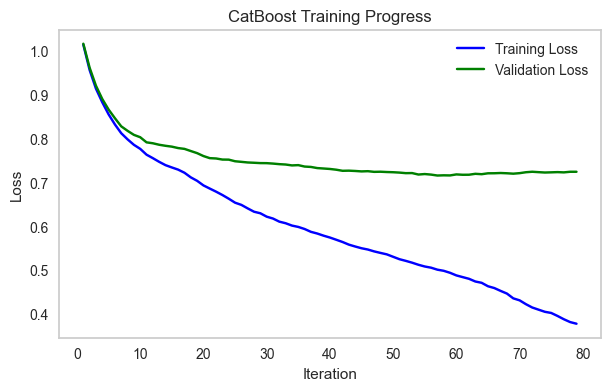

In [41]:
iterations = np.arange(1, len(train_loss) + 1)
 
plt.figure(figsize=(7, 4))
plt.plot(iterations, train_loss, label='Training Loss', color='blue')
plt.plot(iterations, test_loss, label='Validation Loss', color='green')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('CatBoost Training Progress')
plt.legend()
plt.grid()
plt.show()

In [482]:
model.feature_importances_

array(None, dtype=object)

In [479]:
import catboost
import pandas as pd
import matplotlib.pyplot as plt

# Предположим, что у вас есть обученная модель catboost
# model = catboost.CatBoostClassifier(...)  # Здесь подставьте вашу модель

# Получим веса признаков
feature_importance = model.feature_importances_

# Создадим DataFrame для отображения признаков и их весов
feature_importance_df = pd.DataFrame({'Feature': model.feature_names_, 'Importance': feature_importance})

# Отсортируем признаки по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Построим график важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признак')
plt.title('Важность признаков в модели CatBoost')
plt.show()


ValueError: If using all scalar values, you must pass an index

In [295]:
model.get_params()

{'iterations': 500,
 'learning_rate': 0.05,
 'depth': 16,
 'random_seed': 42,
 'use_best_model': True,
 'verbose': 10,
 'auto_class_weights': 'SqrtBalanced',
 'eval_metric': 'AUC',
 'bootstrap_type': 'MVS',
 'early_stopping_rounds': 50,
 'grow_policy': 'Depthwise'}

In [139]:
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier


# Задаем пространство поиска гиперпараметров
param_grid = {
    #'iterations': [100, 200, 500],
    'depth': [8, 12, 16],
    #'learning_rate': [0.005, 0.0005, 0.00005],
    'bootstrap_type':['Bayesian', 'Bernoulli'],
    'grow_policy': ['Depthwise', 'Lossguide']
}
text_features = ['Title', 'Text', 'Tokens']

# Инициализируем модель
model = CatBoostClassifier(eval_metric='TotalF1', early_stopping_rounds=20, verbose=10, 
                        auto_class_weights = 'SqrtBalanced', learning_rate = 0.000001, iterations = 100, text_features=text_features, ='MultiClass')

# Создаем объект RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=2, scoring='precision_macro', verbose=10, random_state=42, 
                                   error_score='raise')

random_search.fit(X_val[['Title', 'Text', 'Tokens']].reset_index(), y_val)

# Оцениваем результаты
print("Лучшие гиперпараметры:", random_search.best_params_)
print("Лучшее значение accuracy:", random_search.best_score_)

SyntaxError: invalid syntax (1425586230.py, line 17)

In [97]:
X_test['Text'] =pd.Series(X_test['Text'], dtype="str")
X_test.reset_index()
X_test['Title'] = pd.Series(X_test['Title'], dtype="str")

In [57]:
X_train['Vectors']

11192    [0.07885464, -0.1340924, -0.14826871, -0.01137...
9899     [7.63366222e-02, -1.40510201e-01, -1.52612165e...
2732     [6.15460090e-02, -1.47441521e-01, -1.49398208e...
9499     [8.81478563e-02, -1.42809540e-01, -1.68437749e...
9414     [5.01417145e-02, -1.32344380e-01, -1.41634047e...
                               ...                        
2446     [3.18782963e-02, -1.44732833e-01, -1.08745031e...
10071    [5.70681244e-02, -1.26584426e-01, -1.47727624e...
4578     [7.99378604e-02, -1.22933254e-01, -1.45503327e...
11       [6.49378225e-02, -1.32232055e-01, -1.68057948e...
463      [0.08228705, -0.12389289, -0.15423578, -0.0036...
Name: Vectors, Length: 8561, dtype: object

In [61]:
from sklearn.metrics import classification_report,accuracy_score
from catboost import Pool, CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

train_pool = Pool(
    X_train, 
    y_train
)
test_pool = Pool(
    X_test, 
    y_test
)

catboost_params = {
    'iterations': 300,
    'learning_rate': 0.00001,
    'eval_metric': 'Accuracy',
    'early_stopping_rounds': 20,
    'use_best_model': True,
    'depth': 6,
    'verbose': 50
}

model = CatBoostClassifier(**catboost_params)
model.fit(train_pool)
pred = model.predict(X_test)
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

0:	learn: 0.8773508	test: 0.8773903	best: 0.8773903 (0)	total: 45ms	remaining: 13.5s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.8773903262
bestIteration = 0

Shrink model to first 1 iterations.
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       100
           0       0.88      1.00      0.93      1560
           1       0.00      0.00      0.00       118

    accuracy                           0.88      1778
   macro avg       0.29      0.33      0.31      1778
weighted avg       0.77      0.88      0.82      1778

0.8773903262092239


/Users/portnovaxenia/PycharmProjects/news_scrapper/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/portnovaxenia/PycharmProjects/news_scrapper/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/portnovaxenia/PycharmProjects/news_scrapper/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [48]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Подготовка данных
X = df['Keywords']  # Предположим, что 'text_column' содержит текстовые данные
y = df['Target']  # Предположим, что 'target_column' содержит целевую переменную

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', BernoulliNB ()),
])
text_clf.fit(X_train, y_train)

# Оценка модели
y_pred = text_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       138
           0       0.89      1.00      0.94      2101
           1       0.75      0.05      0.09       131

    accuracy                           0.89      2370
   macro avg       0.55      0.35      0.34      2370
weighted avg       0.83      0.89      0.84      2370



/Users/portnovaxenia/PycharmProjects/news_scrapper/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/portnovaxenia/PycharmProjects/news_scrapper/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/portnovaxenia/PycharmProjects/news_scrapper/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this 

In [429]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

X = (np.array([list(map(np.float_, vector)) for vector in cleaned_vectors]))  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='rbf', class_weight='balanced')

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.80      0.67      1367
           1       0.42      0.19      0.27      1003

    accuracy                           0.55      2370
   macro avg       0.50      0.50      0.47      2370
weighted avg       0.51      0.55      0.50      2370



In [474]:
from scipy import stats

results = y_pred

# Значение, предполагаемое нулевой гипотезой
null_hypothesis_value = 0

# Выполняем одновыборочный t-тест
t_statistic, p_value = stats.ttest_1samp(results, null_hypothesis_value)

# Выводим результаты
print("t-статистика:", t_statistic)
print("p-значение:", p_value)

# Оценим результат теста с учетом выбранного уровня значимости
alpha = 0.05
if p_value < alpha:
    print("Нулевая гипотеза отвергается в пользу альтернативной")
else:
    print("Нулевая гипотеза принимается")

t-статистика: 23.918284582080663
p-значение: 1.9705457412704225e-113
Нулевая гипотеза отвергается в пользу альтернативной


In [338]:
def calculate_difference(row):
    try:
        date = pd.to_datetime(row['Date'])
        stock_data = eval(row['Stock Data'])
    
        current_day = [row for row in stock_data if row['date'].date() == date.date()]
        previous_day = [row for row in stock_data if row['date'].date() == date.date() - timedelta(days=1)]
        next_day = [row for row in stock_data if row['date'].date() == date.date() + timedelta(days=1)]
        for rows in (current_day, previous_day, next_day):
            for row in rows:
                row['time'] = pd.to_datetime(row['time'], format='%H%M%S').time()
    

        if current_day:
             if date.time() != pd.Timestamp('00:00:00').time():
                 if date.time().hour <= 10:
                     date = date.replace(hour=11)
                 before = [row for row in previous_day if row['time'].hour == (date - timedelta(hours=2)).time().hour]
             
                 if date.time().hour == 22:
                     after = [row for row in next_day if row['time'].hour == 12]
                 else:
                     after = [row for row in current_day if row['time'].hour == (date + timedelta(hours=2)).time().hour]
                 return ((after[0]['volume']) - (before[0]['volume'])) / (before[0]['volume']) * 100
             
             else:
                 if previous_day:
                     return (([row['volume'] for row in previous_day][-1] - [row['volume'] for row in current_day][-1]) / 
                             [row['volume'] for row in current_day][-1]) * 100
                 else:
                    return (([row['volume'] for row in current_day][1] - [row['volume'] for row in current_day][-1]) / 
                            [row['volume'] for row in current_day][-1]) * 100

    except Exception as e:
        print(e)
        print(row)
        pass
    
   

df['Volume'] = df.apply(calculate_difference, axis=1)

In [463]:
abs(df['Volume']).describe()

count     11850.000000
mean        944.799828
std        4488.962371
min           0.000000
25%          47.826087
50%          85.714286
75%         355.491882
max      123780.000000
Name: Volume, dtype: float64

In [352]:
df.iloc[3834]['Text']

'Российская нефтегазовая компания «Новатэк» совершила самое крупное открытие в газовой сфере в России, найдя Дороговское месторождение в Ямало-Ненецком автономном округе. Об этом сообщают Роснедра. Запасы месторождения оцениваются в 16,5 миллиарда кубометров газа, что соответствует примерно 2,5 процента от годовой добычи в России. Крупнейшее нефтяное месторождение было обнаружено в Саратовской области. Запасы участка, получившего название Клинцовское, оцениваются в 12 миллионов тонн. Месторождение было обнаружено компанией «Геопромнефть». В Тюменской области было разведано Кирилкинское с запасами в 5 миллионов тонн, а в Ханты-Мансийском округе Западно-Юильское (4,8 миллиона тонн). Крупнейшие приросты запасов на уже разведываемых газовых месторождениях пришлись на шельф. В частности, «Газпром» добавил 156,5 миллиарда кубометров на Крузенштернском в Карском море. Рост резервов на месторождении имени Кувыкина на Каспийском море у «Лукойла» составил 31,3 миллиарда кубометров. В нефтяном се

In [462]:
df['Volume_target'] = 0
df.loc[abs(df['Volume']) >= 50, 'Volume_target'] = 1
df['Volume_target'].value_counts()

Volume_target
1    8777
0    3073
Name: count, dtype: int64

In [458]:
from sklearn.model_selection import train_test_split

X = df[['Title', 'Date', 'Source', 'Text',
       'Stock', 'Text_preprocessed', 'Tokens','Vectors', 'Keywords', 'Vectors_keywords']]
#X = (np.array([list(map(np.float_, vector)) for vector in cleaned_vectors]))
y = df['Volume_target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, shuffle=True, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, random_state=42, stratify=y_train)

In [461]:
from sklearn.metrics import classification_report,accuracy_score, precision_score
from catboost import Pool, CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

text_features = ['Title', 'Tokens', 'Keywords']

train_pool = Pool(
    X_train[['Title', 'Tokens', 'Keywords', 'Stock']], 
    y_train, 
    text_features=text_features,
    cat_features=['Stock']
)
valid_pool = Pool(
    X_val[['Title','Tokens', 'Keywords', 'Stock']],
    y_val,
    text_features=text_features,
    cat_features=['Stock']
)
test_pool = Pool(
    X_test[['Title','Tokens', 'Keywords', 'Stock']],
    y_test, 
    text_features=text_features,
    cat_features=['Stock']
)


catboost_params = {
    'iterations': 100,
    #'learning_rate': 0.05,
    'eval_metric': 'WKappa',
    'auto_class_weights': 'SqrtBalanced',
    'early_stopping_rounds': 20,
    'use_best_model': True,
    'bootstrap_type':'MVS',
    'grow_policy':'Depthwise',
    'depth': 12,
    'verbose': 10,
    'random_seed': 42
}

model = CatBoostClassifier(**catboost_params)
model.fit(train_pool, eval_set=valid_pool)
pred = model.predict(test_pool)
print(classification_report(y_test,pred))
print(precision_score(y_test,pred, average='macro',  labels=np.unique(y_test)))

Learning rate set to 0.150837
0:	learn: 0.0524893	test: 0.0046385	best: 0.0046385 (0)	total: 2.83s	remaining: 4m 40s
10:	learn: 0.0230805	test: 0.0087933	best: 0.0087933 (9)	total: 25.7s	remaining: 3m 27s
20:	learn: 0.0597131	test: 0.0222731	best: 0.0267499 (14)	total: 47s	remaining: 2m 56s
30:	learn: 0.0943035	test: 0.0251594	best: 0.0267499 (14)	total: 1m 8s	remaining: 2m 32s
40:	learn: 0.1272885	test: 0.0366210	best: 0.0385379 (32)	total: 1m 25s	remaining: 2m 2s
50:	learn: 0.1783651	test: 0.0305968	best: 0.0410524 (42)	total: 1m 43s	remaining: 1m 39s
60:	learn: 0.2325789	test: 0.0211236	best: 0.0410524 (42)	total: 2m 6s	remaining: 1m 21s
Stopped by overfitting detector  (20 iterations wait)

bestTest = 0.04105236148
bestIteration = 42

Shrink model to first 43 iterations.
              precision    recall  f1-score   support

           0       0.70      0.05      0.09       307
           1       0.75      0.99      0.85       878

    accuracy                           0.75      1

In [365]:
df['Stock Data'][0]

"[{'id': 1792325, 'date': Timestamp('2018-07-03 00:00:00'), 'time': 100000, 'open': 13879.0, 'high': 13907.0, 'low': 13874.0, 'close': 13897.0, 'vol': nan, 'volume': 589.0}, {'id': 1792326, 'date': Timestamp('2018-07-03 00:00:00'), 'time': 100100, 'open': 13903.0, 'high': 13903.0, 'low': 13884.0, 'close': 13887.0, 'vol': nan, 'volume': 323.0}, {'id': 1792327, 'date': Timestamp('2018-07-03 00:00:00'), 'time': 100200, 'open': 13886.0, 'high': 13893.0, 'low': 13882.0, 'close': 13890.0, 'vol': nan, 'volume': 348.0}, {'id': 1792328, 'date': Timestamp('2018-07-03 00:00:00'), 'time': 100300, 'open': 13890.0, 'high': 13905.0, 'low': 13887.0, 'close': 13896.0, 'vol': nan, 'volume': 300.0}, {'id': 1792329, 'date': Timestamp('2018-07-03 00:00:00'), 'time': 100400, 'open': 13899.0, 'high': 13901.0, 'low': 13892.0, 'close': 13895.0, 'vol': nan, 'volume': 338.0}, {'id': 1792330, 'date': Timestamp('2018-07-03 00:00:00'), 'time': 100500, 'open': 13892.0, 'high': 13892.0, 'low': 13879.0, 'close': 13881

In [397]:
def calculate_difference(row):
    median_prev = {}
    median_curr = {}
    median_next = {}
    try:
        date = pd.to_datetime(row['Date'])
        stock_data = eval(row['Stock Data'])
    
        current_day = [row for row in stock_data if row['date'].date() == date.date()]
        previous_day = [row for row in stock_data if row['date'].date() == date.date() - timedelta(days=1)]
        next_day = [row for row in stock_data if row['date'].date() == date.date() + timedelta(days=1)]
        
        for row in previous_day:
            time = pd.to_datetime(row['time'], format='%H%M%S').time()
            median_prev[time] = row['volume']
        
        for row in current_day:
            time = pd.to_datetime(row['time'], format='%H%M%S').time()
            median_curr[time] = row['volume']
        
        for row in next_day:
            time = pd.to_datetime(row['time'], format='%H%M%S').time()
            median_next[time] = row['volume']
        
        return median_prev, median_curr, median_next
        
    except Exception as e:
        print(e)
        print(row)
        pass

    
   
grouped = df[df['Stock'] == 'GAZP']
results = grouped.apply(calculate_difference, axis=1)

In [398]:
results

0        ({10:00:00: 589.0, 10:01:00: 323.0, 10:02:00: ...
2        ({}, {10:00:00: 931, 10:01:00: 942, 10:02:00: ...
4        ({10:00:00: 2327.0, 10:01:00: 332.0, 10:02:00:...
5        ({10:30:00: 2491.0, 10:31:00: 445.0, 10:32:00:...
6        ({10:00:00: 529.0, 10:01:00: 485.0, 10:02:00: ...
                               ...                        
11843    ({10:00:00: 630.0, 10:01:00: 1006.0, 10:02:00:...
11845    ({}, {10:30:00: 2667, 10:31:00: 1691, 10:32:00...
11846    ({10:00:00: 2047.0, 10:01:00: 1270.0, 10:02:00...
11847    ({}, {10:00:00: 156, 10:01:00: 129, 10:02:00: ...
11848    ({10:30:00: 1021.0, 10:31:00: 604.0, 10:32:00:...
Length: 7790, dtype: object

In [399]:
# Создадим три пустых словаря для средних значений
average_prev = {}
average_curr = {}
average_next = {}

# Пройдемся по каждому словарю в results
for result in results:
    # Объединим все соответствующие значения для каждой минуты из словарей предыдущего, текущего и следующего дня
    for minute in result[0].keys():
        if minute not in average_prev:
            average_prev[minute] = []
        average_prev[minute].append(result[0][minute])
    
    for minute in result[1].keys():
        if minute not in average_curr:
            average_curr[minute] = []
        average_curr[minute].append(result[1][minute])
    
    for minute in result[2].keys():
        if minute not in average_next:
            average_next[minute] = []
        average_next[minute].append(result[2][minute])

# Усредним значения для каждой минуты
average_prev = {minute: sum(values) / len(values) for minute, values in average_prev.items()}
average_curr = {minute: sum(values) / len(values) for minute, values in average_curr.items()}
average_next = {minute: sum(values) / len(values) for minute, values in average_next.items()}



In [403]:
average_prev[0]

KeyError: 0

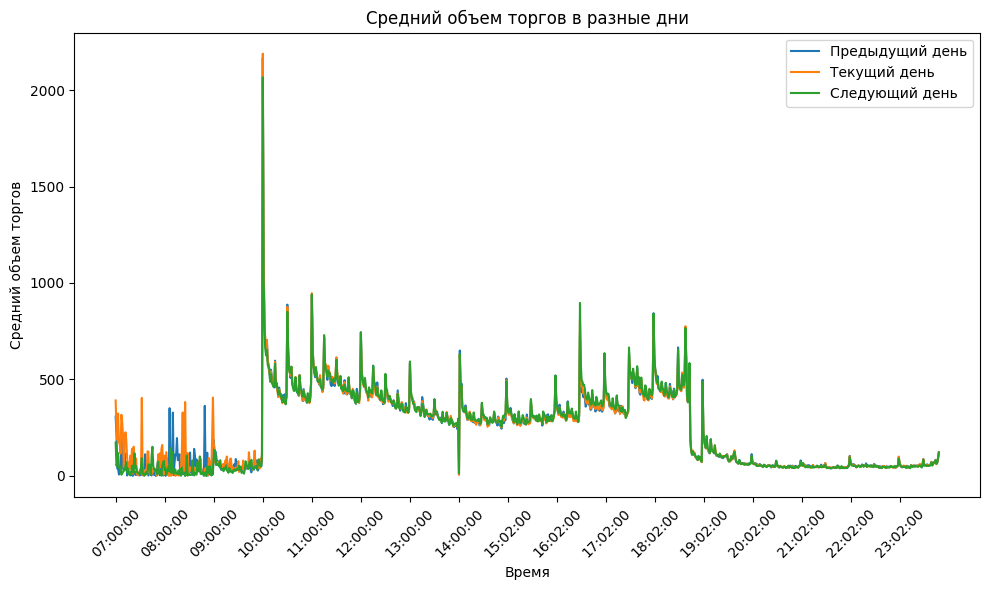

In [408]:
import matplotlib.pyplot as plt

# Создадим списки для каждого дня
all_times = sorted(set(list(average_prev.keys()) + list(average_curr.keys()) + list(average_next.keys())))
prev_day_values = [average_prev.get(time, 0) for time in all_times]
curr_day_values = [average_curr.get(time, 0) for time in all_times]
next_day_values = [average_next.get(time, 0) for time in all_times]

step = 60  # в минутах

# Создадим список меток времени для каждого часа
all_times_str_hourly = [str(time) for i, time in enumerate(all_times) if i % step == 0]

# Создадим график
plt.figure(figsize=(10, 6))

# Построим график для каждого из трех дней
plt.plot(all_times_str, prev_day_values, label='Предыдущий день')
plt.plot(all_times_str, curr_day_values, label='Текущий день')
plt.plot(all_times_str, next_day_values, label='Следующий день')

# Добавим описание осей и заголовок графика
plt.xlabel('Время')
plt.ylabel('Средний объем торгов')
plt.title('Средний объем торгов в разные дни')
plt.legend()

# Покажем график с метками времени каждый час
plt.xticks(all_times_str_hourly, rotation=45)
plt.tight_layout()
plt.show()


In [497]:
from scipy.stats import ttest_ind

# Разделите данные на две группы: положительные и отрицательные новости
positive_news = df[df['Target'] == 1]['Difference']
negative_news = df[df['Target'] == -1]['Difference']

# Примените t-тест
t_statistic, p_value = ttest_ind(positive_news, negative_news)

# Выведем результаты
print("T-статистика:", t_statistic)
print("P-value:", p_value)

# Определим уровень значимости
alpha = 0.05

# Проверим статистическую значимость
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: средние значения различны.")
else:
    print("Не отвергаем нулевую гипотезу: нет оснований полагать, что средние значения различны.")


T-статистика: 1.2937961311434907
P-value: 0.19606091257406794
Не отвергаем нулевую гипотезу: нет оснований полагать, что средние значения различны.
